# Introduction

The purpose is to compare the average global temperature with those of my city.

In [38]:
import pandas as pd

ny_df = pd.read_csv("new_york.csv")
global_df = pd.read_csv("global.csv")

The data was extracted from the global_data table and the city_data tables usng the following SQL queries. I chose to analyze the data using Python and Pandas since I am more comfortable with that than excel.

SELECT year, avg_temp FROM global_data;

SELECT year, avg_temp FROM city_data
WHERE UPPER(city) LIKE UPPER('new york');

In [39]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 2 columns):
year        271 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


Looks like there is some missing temps in the NY data. That needs to be cleaned up.

In [42]:
ny_df = ny_df.dropna()

In [43]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 270
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 6.2 KB


Now we have eliminated entries without temperatures in the NY dataframe.

In [44]:
ny_df.head()

,year,avg_temp
0,1743,3.26
1,1744,11.66
2,1745,1.13
7,1750,10.07
8,1751,10.79


In [25]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [45]:
global_df.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


The data in the NY dataframe looks a bit erratic, so we will add a moving average to smo0th it out. We'll do that for the global data as well just to have a fair comparison.

In [48]:
ny_df['moving_average'] = ny_df['avg_temp'].rolling(7).mean()

In [49]:
ny_df.head(20)

,year,avg_temp,moving_average
0,1743,3.26,NaN
1,1744,11.66,NaN
2,1745,1.13,NaN
7,1750,10.07,NaN
8,1751,10.79,NaN
9,1752,2.81,NaN
10,1753,9.52,7.034286
11,1754,9.88,7.980000
12,1755,6.61,7.258571
13,1756,9.94,8.517143


In [58]:
global_df['moving_average'] = global_df['avg_temp'].rolling(7).mean()

In [59]:
global_df.head(20)

,year,avg_temp,moving_average
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,8.078571
7,1757,9.02,8.121429
8,1758,6.74,7.944286
9,1759,7.99,8.260000


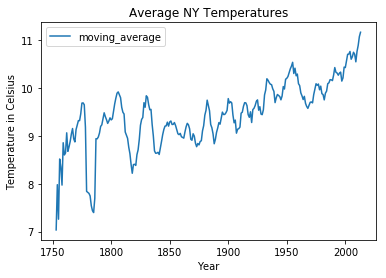

In [66]:
ny_plot = ny_df.plot(x='year', y='moving_average')
ny_plot.set_title("Average NY Temperatures")
ny_plot.set_xlabel("Year")
ny_plot.set_ylabel("Temperature in Celsius")
ny_plot;

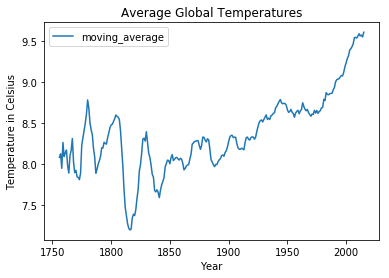

In [68]:
global_plot = global_df.plot(x='year', y='moving_average')
global_plot.set_title("Average Global Temperatures")
global_plot.set_xlabel("Year")
global_plot.set_ylabel("Temperature in Celsius")
global_plot;